<a href="https://colab.research.google.com/github/eriosta/ai-course/blob/main/4_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1. Regression-based Machine Learning

## Learning Objectives

1. **Algorithm Understanding:** Understand the differences between Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regression, and Gradient Boosting Regression in terms of algorithm type, regularization techniques, interpretability, and deployment ease.

2. **Evaluation Metrics:** Gain proficiency in using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Coefficient of Determination (R2) as evaluation metrics to assess the performance of regression models.

3. **Data Preparation**: Learn how to prepare data for regression modeling, including handling categorical features using one-hot encoding and splitting data into training and testing sets.

4. **Model Training and Evaluation:** Acquire the skills to train and evaluate different regression models using libraries like scikit-learn, and understand how to interpret and compare their evaluation results.

5. **Explainability and Interpretability:** Explore the concept of explainability in machine learning, perform SHAP analysis to explain model predictions, and visualize SHAP values to gain insights into feature importance.


## Background

<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>Algorithm</th>
      <th>Regularization</th>
      <th>Interpretability</th>
      <th>Deployment Ease</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Linear Regression</td>
      <td>Linear</td>
      <td>None</td>
      <td>🔍 High</td>
      <td>🚀 Easy</td>
    </tr>
    <tr>
      <td>Ridge Regression</td>
      <td>Linear</td>
      <td>L2 Regularization</td>
      <td>🔍 High</td>
      <td>🚀 Easy</td>
    </tr>
    <tr>
      <td>Lasso Regression</td>
      <td>Linear</td>
      <td>L1 Regularization</td>
      <td>🔍 High</td>
      <td>🚀 Easy</td>
    </tr>
    <tr>
      <td>Random Forest Regression</td>
      <td>Ensemble</td>
      <td>None</td>
      <td>🔍 Medium</td>
      <td>🛠️ Relatively Easy</td>
    </tr>
    <tr>
      <td>Gradient Boosting Regression</td>
      <td>Ensemble</td>
      <td>Gradient Boosting</td>
      <td>🔍 Medium</td>
      <td>🛠️ Relatively Easy</td>
    </tr>
  </tbody>
</table>

### Linear Regression:
📈 Linear Regression is a straightforward and easy-to-understand model that assumes a straight-line relationship between the factors we consider and the outcome we want to predict. It identifies the line that best represents the data and minimizes the overall distance between predicted and actual values. This method helps clinicians when the relationship between factors and outcomes seems to follow a straight path.

### Ridge Regression:
📈 Ridge Regression builds on Linear Regression by adding a protective layer to the model. It introduces a regularization technique that ensures our predictions aren't overly influenced by any single factor. This is particularly helpful when multiple factors are connected, as Ridge Regression prevents our model from overfitting, ultimately making it more reliable.

### Lasso Regression:
📈 Lasso Regression is another advancement of Linear Regression, with a focus on feature selection. It stands for "Least Absolute Shrinkage and Selection Operator." Lasso finds the most significant factors in our data, discarding any irrelevant or redundant ones. By doing so, it simplifies the model's explanation and makes it more useful in situations with many possible factors.

### Random Forest Regression:
🌲 Random Forest Regression assembles numerous decision trees into a powerful ensemble. Each tree contributes its prediction, and together, they form a comprehensive view of our data. This approach is perfect when relationships are intricate, as it can identify patterns that might be hard to spot individually. Random Forest is well-suited to scenarios where factors can interact in unexpected ways.

### Gradient Boosting Regression:
⚡ Gradient Boosting Regression is an advanced ensemble technique that assembles multiple weak predictive models into a strong one. It works like a medical team refining their diagnosis collaboratively. Each new member focuses on correcting the mistakes made by the previous ones, leading to a highly accurate final decision. It uses a process called gradient descent* to iteratively adjust the model's predictions based on the errors observed. This method is particularly effective when dealing with complex medical scenarios where factors interact in intricate ways, allowing the model to capture even the most intricate patterns in the data.

*Gradient descent optimizes a function by iteratively adjusting parameters in the direction of steepest decrease, aiming to reach the lowest point (minimum). It's used in machine learning to fine-tune model parameters for better predictions. Imagine a clinician aiming to find the ideal dosage of a medication for a patient. The goal is to minimize the patient's symptoms. Gradient descent works similarly: starting with an initial dosage, the clinician adjusts it step by step in the direction that reduces symptoms the most, eventually finding the optimal dosage. This iterative approach helps clinicians fine-tune treatments for better patient outcomes.

## Evaluation Metrics

### Mean Absolute Error (MAE):
The Mean Absolute Error (MAE) is a metric that measures the average magnitude of the errors between predicted and actual values. It gives an idea of how far off the model's predictions are from the actual outcomes. A lower MAE indicates better model performance.

### Mean Squared Error (MSE):
The Mean Squared Error (MSE) measures the average squared differences between predicted and actual values. It penalizes larger errors more heavily, making it sensitive to outliers. Like MAE, a lower MSE indicates better model performance.

### Coefficient of Determination (R2):
The Coefficient of Determination (R2) represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates that the model explains all the variability in the dependent variable.


## Load Data and Prepare Features

In [ ]:
! pip install -q pandas-profiling shap

In [ ]:
import os
import shutil

# Replace 'path_to_kaggle_json' with the actual path to your downloaded kaggle.json file
path_to_kaggle_json = '/content/drive/MyDrive/Workshop/kaggle.json'

# Define the target directory for kaggle.json (usually /root/.kaggle/)
target_dir = '/root/.kaggle/'

try:
    os.makedirs(target_dir, exist_ok=True)
    shutil.copy(path_to_kaggle_json, target_dir)
    os.chmod(os.path.join(target_dir, 'kaggle.json'), 600)  # Set appropriate permissions
    print("kaggle.json successfully copied to the correct directory.")
except Exception as e:
    print("An error occurred:", e)

kaggle.json successfully copied to the correct directory.


In [ ]:
! kaggle datasets download -d mirichoi0218/insurance
! unzip insurance.zip

## Exploratory Data Analysis

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('insurance.csv')

# Generate the EDA report
profile = ProfileReport(df, title="Automated EDA Report", explorative=True)
profile.to_file("eda_report.html")


<ipython-input-4-b2e8f4888f31>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Train and Evaluate Regression Models

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


                         Method          MAE           MSE        R2
0             Linear Regression  4181.194474  3.359692e+07  0.783593
1              Ridge Regression  4193.585298  3.364504e+07  0.783283
2              Lasso Regression  4182.426034  3.360551e+07  0.783538
3      Random Forest Regression  2574.201104  2.159026e+07  0.860931
4  Gradient Boosting Regression  2441.991557  1.874007e+07  0.879290


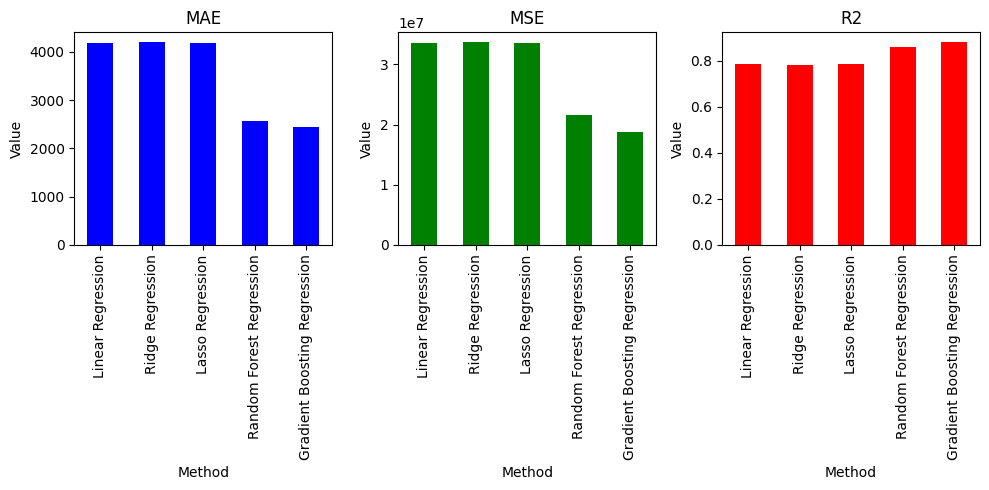

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import shap

# Load the data
df = pd.read_csv('insurance.csv')

# Prepare the data
X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target

# One-hot encode categorical features
categorical_features = ['sex', 'smoker', 'region']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

# Initialize results DataFrame
results = pd.DataFrame(columns=['Method', 'MAE', 'MSE', 'R2'])

# Train and evaluate each model
for method, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = results.append({'Method': method, 'MAE': mae, 'MSE': mse, 'R2': r2}, ignore_index=True)

# Print the results
print(results)

# Bar plots for metrics
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
results.plot(kind='bar', x='Method', y='MAE', ax=axs[0], color='blue', title='MAE', legend=False)
results.plot(kind='bar', x='Method', y='MSE', ax=axs[1], color='green', title='MSE', legend=False)
results.plot(kind='bar', x='Method', y='R2', ax=axs[2], color='red', title='R2', legend=False)

for ax in axs:
    ax.set_ylabel('Value')
    ax.set_xlabel('Method')

plt.tight_layout()
plt.show()

## Identify and Save Best Performing Model

In [ ]:
import pickle

# Identify the best performing method based on lowest average rank of metrics
results['AverageRank'] = results[['MAE', 'MSE', 'R2']].rank().mean(axis=1)
best_method = results.loc[results['AverageRank'].idxmin()]['Method']
print(f"Best performing method (based on lowest average rank of metrics): {best_method}")

# Save the best model as model.pkl
best_model = models[best_method]
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Best performing method (based on lowest average rank of metrics): Gradient Boosting Regression


## Explainability with SHAP

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


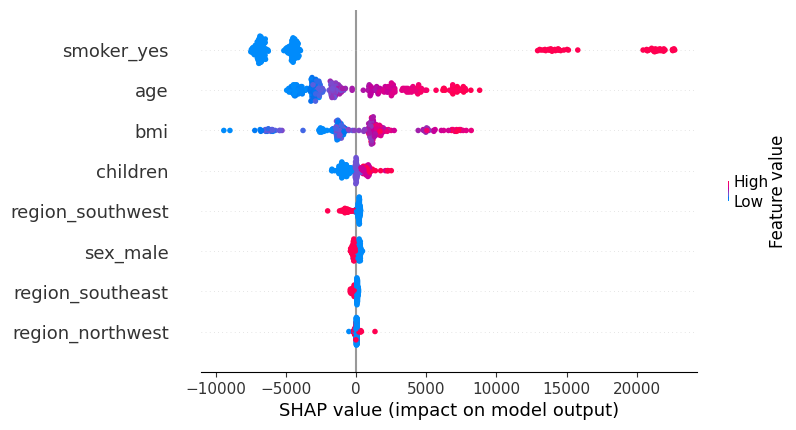

<Figure size 800x600 with 0 Axes>

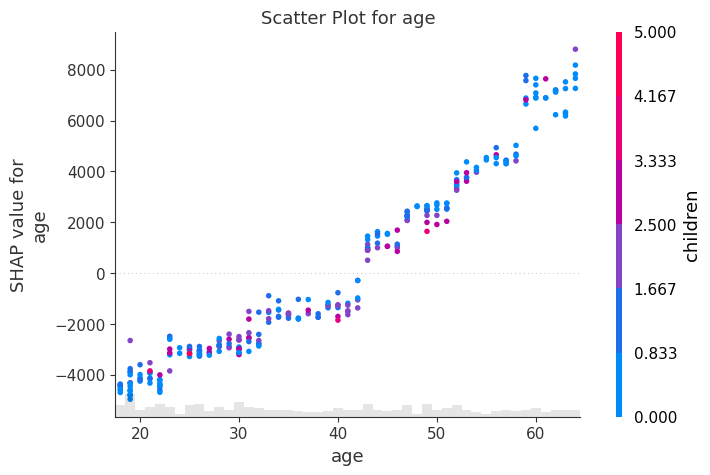

<Figure size 800x600 with 0 Axes>

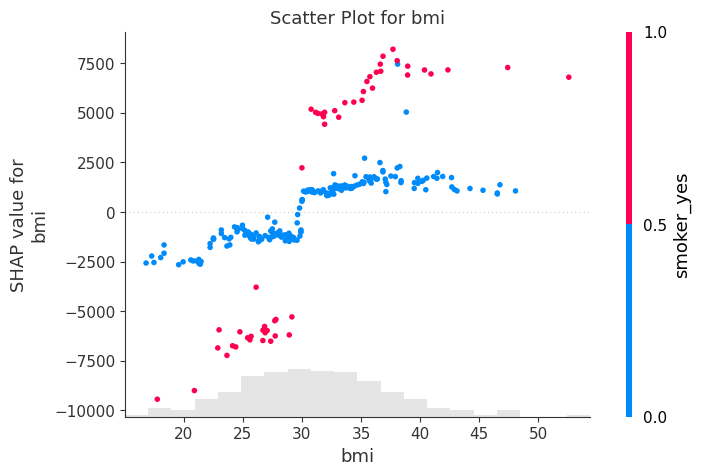

<Figure size 800x600 with 0 Axes>

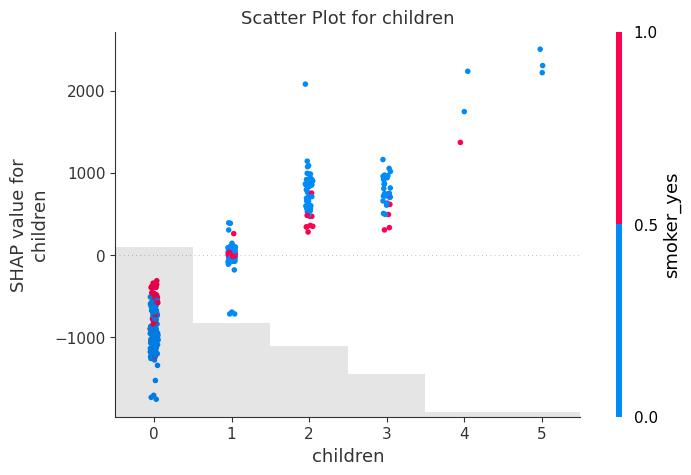

<Figure size 800x600 with 0 Axes>

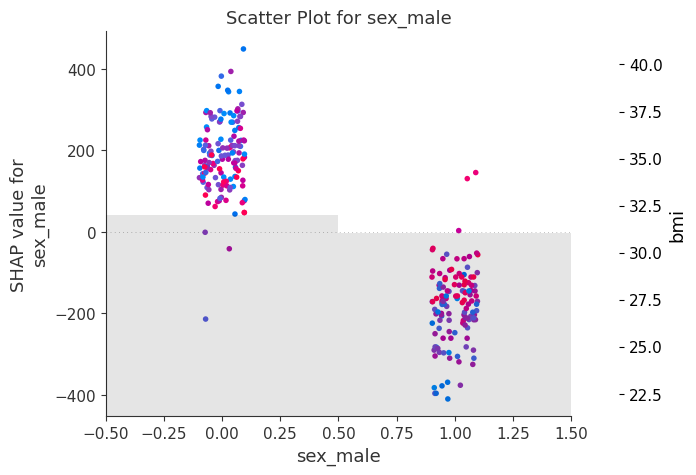

<Figure size 800x600 with 0 Axes>

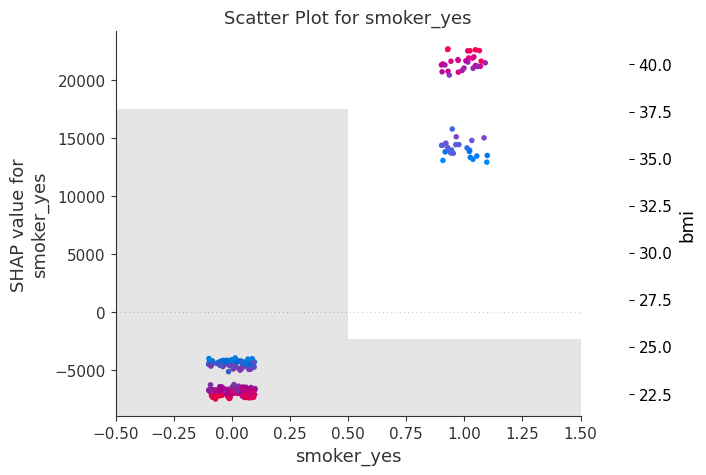

<Figure size 800x600 with 0 Axes>

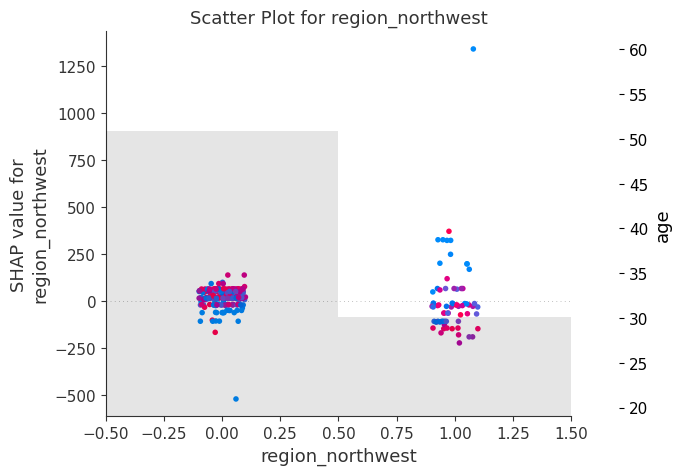

<Figure size 800x600 with 0 Axes>

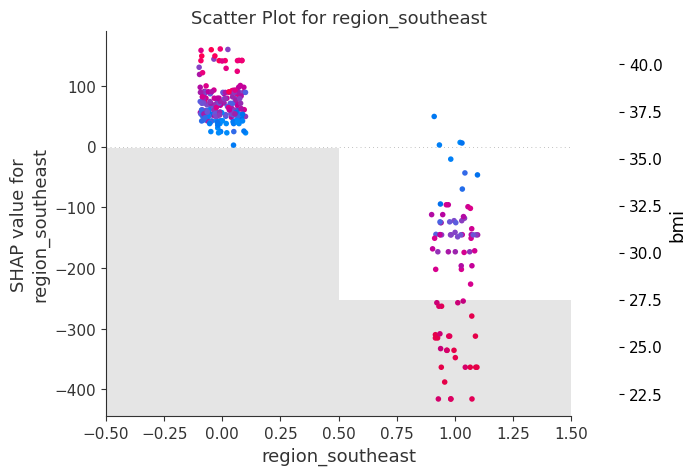

<Figure size 800x600 with 0 Axes>

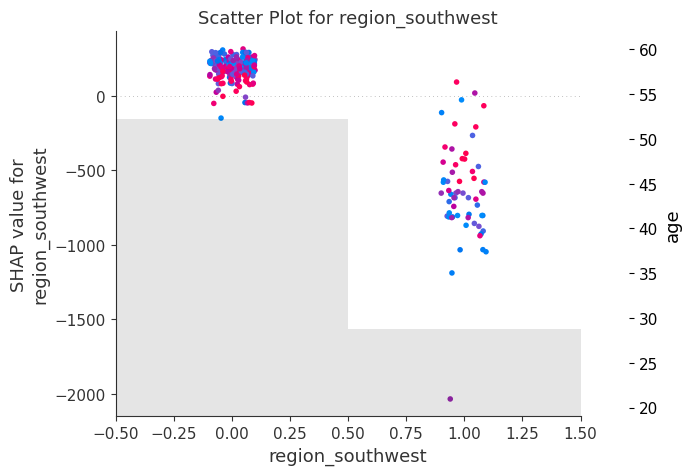

In [ ]:
# Perform SHAP analysis on the best method
best_model = models[best_method]
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)

# Create scatter plots for each feature using SHAP values
for feature in X_encoded.columns:
    plt.figure(figsize=(8, 6))
    shap.plots.scatter(shap_values[:, feature], color=shap_values, title=f'Scatter Plot for {feature}')
    plt.show()

## Deploy and Run Streamlit App

In [ ]:
!pip install -q streamlit

In [ ]:
%%writefile my_app.py

import streamlit as st
import pickle
from sklearn.linear_model import LinearRegression  # Replace with your model import

# Load the trained model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title('My Machine Learning Model')

# Create input elements for user interaction
input_value = st.number_input('Enter a value:', min_value=0.0, max_value=100.0, value=50.0)
prediction = model.predict([[input_value]])

st.write(f'Predicted Output: {prediction[0]}')

Overwriting my_app.py


In [ ]:
# !streamlit run my_app.py